In [1]:
import numpy as np
import jax.numpy as jnp
import cv2

import sys
sys.path.append('../../')
from v1diffusion import utils, transforms, operators, evolution, processing, metrics, examples

In [2]:
I = np.zeros((256,256), dtype=np.float32)
I[30::38,:] = 1
I[31::38,:] = 1
I[:,123:133] = 0
I_h = cv2.GaussianBlur(I,(15,15),0.4)

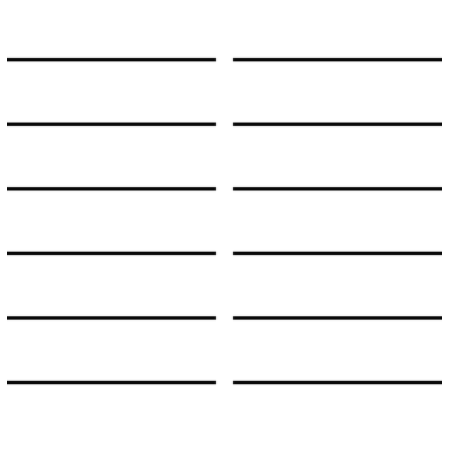

In [3]:
utils.imshow(I_h)

In [4]:
Ia = I_h.copy()
sigma = 100
sigma2 = 100
T = 6
T2 = 0.2
N = 6

Ja = transforms.lift_gaussian(Ia,sigma)
for n in range(N):

    Ja = evolution.parallel_diffusion(Ja,T,beta=0.2)

Ia = transforms.project_max(Ja)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 69.65it/s]


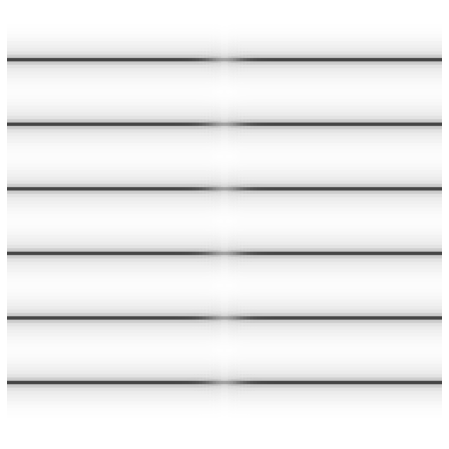

In [5]:
utils.imshow(Ia)

In [6]:
Ia = I_h.copy()

sigma = 100
T1 = 5
T2 = 0.5
N = 6

Ja = transforms.lift_gaussian(Ia,sigma)

for n in range(N):
    Ja = evolution.parallel_diffusion(Ja,T,beta=0.5)

    Ja = evolution.orthogonal_concentration(Ja,T=T2, beta=0.1)

Ia = transforms.project_max(Ja)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 85.16it/s]


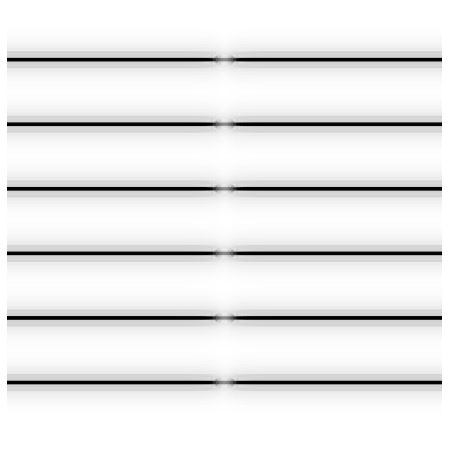

In [7]:
utils.imshow(Ia)